In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [61]:
from sklearn.datasets import load_boston
X,Y=load_boston(return_X_y=True)
# from sklearn.datasets import load_wine
# X,Y=load_wine(return_X_y=True)

In [62]:
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [63]:
def normalize(X):
  for i in range(0,X.shape[1]):
    X[:,i] = ((X[:,i] - np.mean(X[:,i]))/np.std(X[:,i]))
  return X


In [64]:
X=normalize(X)

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [65]:
Y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


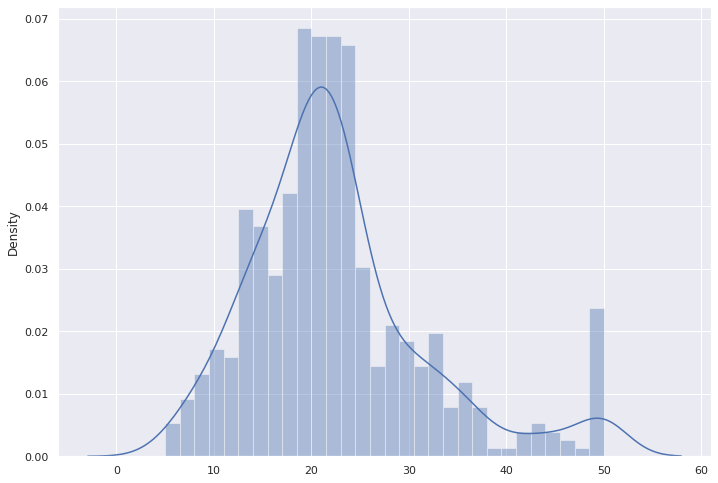

In [66]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(Y, bins=30)
plt.show()

In [67]:
def find_correlation(X):
  correlation_matrix=np.zeros((X.shape[1],X.shape[1]))
  mean_features=[X[:,j].sum(axis=0)/len(X) for j in range(X.shape[1])]
  # print(mean_features)
  
  def correlation_calculation_formula(vecX,vecY,X_mean,Y_mean):
    numerator=np.sum((np.array(vecX)-X_mean)*(np.array(vecY)-Y_mean))
    denominator=np.sqrt(np.sum((np.array(vecX)-X_mean)**2) * np.sum((np.array(vecY)-Y_mean)**2))
    correlation_coff=numerator/denominator
    return correlation_coff

  for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
      correlation_matrix[i][j]=correlation_calculation_formula(X[:,i],X[:,j],mean_features[i],mean_features[j])
  # print(correlation_matrix)
  return correlation_matrix 

corr_matrix=find_correlation(X)
  


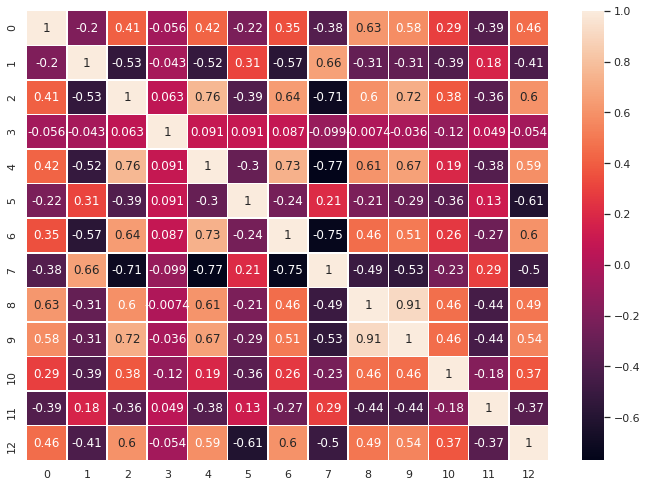

In [68]:
ax = sns.heatmap(corr_matrix , linewidth = 0.5 ,annot=True)#, cmap = 'autumn')

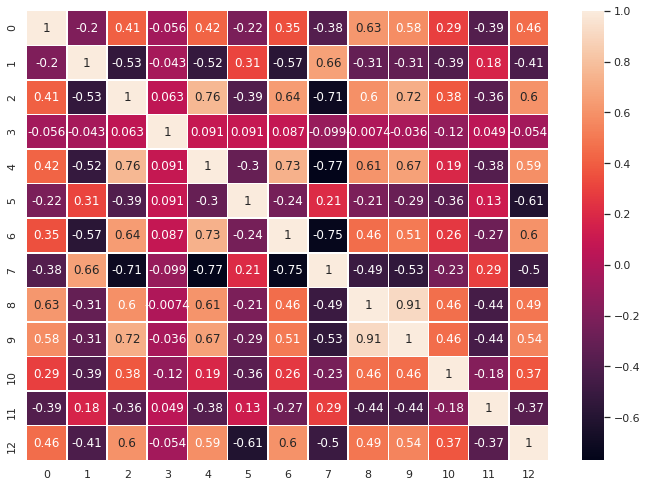

In [69]:
# Checked through Seaborn on dataset for Confirmation
ax = sns.heatmap(pd.DataFrame(X).corr(), linewidth = 0.5 , annot=True) #, cmap = 'autumn' )

In [70]:
#finding 2 features that are in between 0.0 and 0.2
vec=[]
vec_idx=[]
for i in range(X.shape[1]):
  for j in range(X.shape[1]):
    if corr_matrix[i][j]>=0.0 and corr_matrix[i][j]<=0.1:
      vec.append(corr_matrix[i][j])
      vec_idx.append((i,j))
      
print(vec)
print(vec_idx)

[0.06293802748966494, 0.06293802748966494, 0.09120280684249513, 0.09125122504345662, 0.08651777425454277, 0.04878848495516651, 0.09120280684249513, 0.09125122504345662, 0.08651777425454277, 0.04878848495516651]
[(2, 3), (3, 2), (3, 4), (3, 5), (3, 6), (3, 11), (4, 3), (5, 3), (6, 3), (11, 3)]


In [71]:
# #creating new dataframe with 2 features and 1 label
# new_array=[X[:,3].T,X[:,11].T,Y.T]
# df=pd.DataFrame(data = new_array).T

In [72]:
# df

In [73]:
# x=df.iloc[:,1].values.reshape(len(X),1)
# y=df.iloc[:,2].values.reshape(len(Y),1)

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
x=X_train
y=Y_train
print(x.shape)
print(y.shape)

(404, 13)
(404,)


In [75]:
# a=[1,2,3]
# for i in range(len(a)):
#   if a[i]>=2:
#     a[i]=5
# a

epoch: 0   loss: 303.97351285793803
epoch: 1   loss: 249.23925743179504
epoch: 2   loss: 212.20322589038923
epoch: 3   loss: 183.59884248144363
epoch: 4   loss: 160.00029763681468
epoch: 5   loss: 139.9698300189754
epoch: 6   loss: 122.77108640011079
epoch: 7   loss: 107.93601506904069
epoch: 8   loss: 95.11613502853712
epoch: 9   loss: 84.0289582776892
epoch: 10   loss: 74.43659986692653
epoch: 11   loss: 66.13557520434802
epoch: 12   loss: 58.950738846616495
epoch: 13   loss: 52.73096522031344
epoch: 14   loss: 47.34572362983163
epoch: 15   loss: 42.682222532131746
epoch: 16   loss: 38.64297770752759
epoch: 17   loss: 35.143723808653085
epoch: 18   loss: 32.111614762039245
epoch: 19   loss: 29.483670959976106
epoch: 20   loss: 27.205438617827962
epoch: 21   loss: 25.229831983180425
epoch: 22   loss: 23.516133295158347
epoch: 23   loss: 22.029128900904453
epoch: 24   loss: 20.73836292010642
epoch: 25   loss: 19.61749240735475
epoch: 26   loss: 18.64373016390901
epoch: 27   loss: 17.79

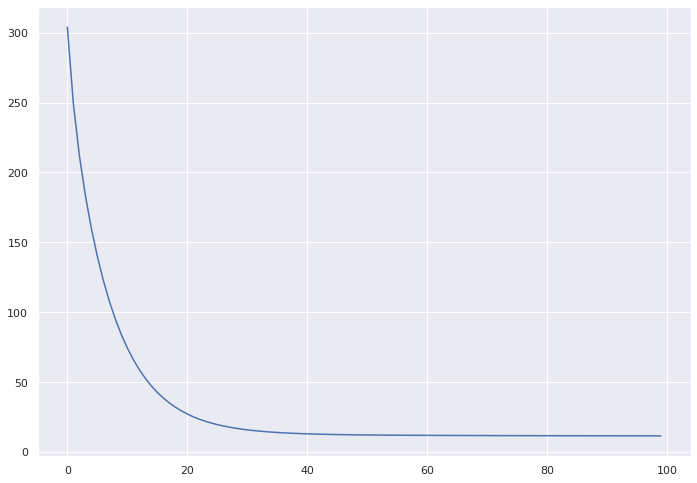

In [101]:
np.random.seed(47)
theta=[np.random.rand() for t in range(0,x.shape[1]+1)]
alpha = 0.07

def hypothesis_function(x,theta):
 
  hypothesis = theta[0] + np.sum((theta[1:] * x),axis=1)
  
  return hypothesis


def cost_function(x,y,hypothesis):

  cost=(1/2)*(1/len(x))*(np.sum((hypothesis-y)**2))

  return cost 



def predict(x,theta):

  y_pred = theta[0] + np.sum((theta[1:] * x),axis=1)

  return y_pred



def linear_regression_gradient_descent(x,y,theta,alpha):
  
  hypothesis=hypothesis_function(x,theta)
  theta[0] = theta[0] - alpha*(1/len(x))*(np.sum((hypothesis-y)*1))
  
  for j in range(0,x.shape[1]):
    theta[j+1] = theta[j+1] - alpha*(1/len(x))*(np.sum((hypothesis-y)*x[:,j]))

  return theta



#epoch 0

hypothesis=hypothesis_function(x,theta)
cost=cost_function(x,y,hypothesis)

print("epoch:",0," ","loss:",cost)

##

dic_theta=[]
dic_loss=[]
dic_hyp=[]

dic_theta.append(theta)
dic_loss.append(cost)
dic_hyp.append(hypothesis)

# img_array=[]

for epoch in range(1,100):

  theta = linear_regression_gradient_descent(x,y,theta,alpha)
  hypothesis = hypothesis_function(x,theta)
  cost=cost_function(x,y,hypothesis)

  print("epoch:",epoch," ","loss:",cost)

  dic_theta.append(theta)
  dic_loss.append(cost)
  dic_hyp.append(hypothesis)

print(predict(x,dic_theta[-1]))

epochs=np.arange(0,100)
plt.plot(epochs,dic_loss)





  # """ 
  # for 1 variable plot graphs

  # plt.scatter(x,hypothesis_new)
  # # plt.plot([min(x), max(x)], [min(hypothesis), max(hypothesis)], color='red')
  # plt.scatter(x,y)
  # # plt.show()
  # plt.savefig("output_line.jpg")
  # img = cv2.imread("output_line.jpg")
  # height, width, layers = img.shape
  # size = (width,height)
  # img_array.append(img)
  # """

# """
# out = cv2.VideoWriter('project_view_line.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 15, size) 
# for i in range(len(img_array)):
#     out.write(img_array[i])
# out.release()
# """




In [81]:
y

array([13.1, 50. ,  8.8, 20.6, 12.1, 50. , 24.1, 16.1, 23.9, 24.3, 13.1,
       30.3, 15.2, 13.8, 26.4, 16.6, 18.9, 17.6, 18.7, 33.4, 20.7, 17.1,
       23.4, 26.5, 21.4, 21.5, 19.2, 50. , 50. , 23. , 10.5, 17.8, 10.9,
       21. , 13.8, 10.5, 22.2, 30.5, 19.4, 15.6, 20.2, 19.3, 34.6, 50. ,
       24. , 18.7, 19.8, 22.5, 13.3, 50. , 11.8, 11. , 23.7, 35.4, 15.2,
       24.4, 33.4, 31.6, 13.4, 34.9, 14.4, 35.4, 25.3, 18.3, 16.6, 13.4,
       23.6, 27.5, 22.2, 17.7, 14.3, 21.7,  8.4, 15.3, 20.3, 32. , 20. ,
       19.1, 28.7, 46. , 22.6, 23.9, 21.9, 15.6, 50. , 25. , 37.9, 21.6,
       19.3, 17.5, 22.9, 15. , 27.5, 10.2, 23.8, 23.9, 20.1, 16.5, 33.1,
       14.6, 28.4, 23.7, 12.3, 31.5, 22. , 12.5, 35.1, 14.9, 22.9, 22.9,
       19.3, 19.8, 20. , 29.6, 20.5, 29. , 20.7, 19.9, 11.9,  5. , 23.3,
       20.6, 22.9, 19.6, 14.1, 30.8, 43.1, 19.9, 13.9, 22.3, 14.3, 23.9,
       16. , 20.5, 10.2, 20.1, 12.8, 18.9, 22. , 20.4, 17.5, 13.1, 22. ,
       45.4, 18.8, 20. , 20.1, 21.4, 17.4, 21.1, 28

# Testing Phase

In [102]:
y_test_pred = predict(X_test,dic_theta[-1])


In [103]:
y_test_pred

array([37.30495132, 30.52351883, 27.09521269,  4.81105644, 35.26197065,
        5.54548942, 27.86151939, 31.57122971, 27.04840881, 22.12772126,
       32.35069622, 21.34965163, 23.41767202, 32.25202089, 27.56235153,
       16.38506752, -1.23536844, 19.74908273, 14.12970828, 13.37039678,
        4.32548134, 20.53982502, 37.99510567, 24.35915967, 31.35740339,
       11.33688684, 25.0782879 , 23.79736871, 23.07508549, 23.00897008,
       13.18328336,  9.22864742, 18.05861682, 23.15659025, 28.3130816 ,
       19.84480426, 30.09170891,  8.47081547, 41.23922187, 33.75836638,
       20.44543414,  2.95918634, 29.17129445, 12.09426028, 26.78983213,
       31.00708579, -6.21547034, 17.80911787, 22.46681176, 13.2213539 ,
       20.65111678, 19.6181262 , 23.88790338, 13.16874123, 18.45636549,
       25.87069966, 35.50093498, 15.41648033, 28.06060645, 20.84925282,
       20.83142524, 25.58331137, 15.1274847 , 32.90551679, 24.0368208 ,
       12.83847354, 20.06311881, 24.69958323, 21.31992176, 21.26

In [93]:
Y_test


array([37.6, 27.9, 22.6, 13.8, 35.2, 10.4, 23.9, 29. , 22.8, 23.2, 33.2,
       19. , 20.3, 36.1, 24.4, 17.2, 17.9, 19.6, 19.7, 15. ,  8.1, 23. ,
       44.8, 23.1, 32.2, 10.8, 23.1, 21.2, 22.2, 24.1, 17.3,  7. , 12.7,
       17.8, 26.4, 19.6, 25.1,  8.3, 48.8, 34.9, 13.8, 14.4, 30.1, 12.7,
       27.1, 24.8,  7. , 20.5, 21.5, 14. , 20.4, 22.2, 21.4, 13.5, 19.4,
       24.7, 43.8, 14.1, 28.6, 19.7, 16.8, 23.2, 16.2, 41.3, 22.7,  8.3,
       18.4, 24.7, 21.7, 20.6, 16.7, 22.1, 19.4, 27.5, 27.9, 30.1, 17.4,
       15.4, 31. , 14.2, 19.6, 50. , 21.7, 11.7, 19.4, 13. , 17.5,  9.7,
       20.3, 18.6, 50. , 19.6, 21.4, 18.4, 22.6, 25. , 15.6, 26.6, 22.4,
       13.1, 23. , 24.5])

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_model = LinearRegression()
lin_model.fit(x, y)
y_train_predict = lin_model.predict(X_train)
print(mean_squared_error(y, y_train_predict))
y_train_predict

22.477090408387625


array([13.82876985, 44.52852811,  3.91599095, 22.37795855, 18.23592252,
       25.52374759, 29.43974677, 18.69453347, 27.85646296, 24.64473374,
       20.53039645, 32.24809769, 19.53384497, 10.6751149 , 22.77616204,
       17.35106653, 18.54046999, 16.36847196, 21.72533915, 35.71120541,
       21.83662056, 19.76107221, 24.18285088, 25.5255809 , 20.8464168 ,
       24.53500383, 23.78138462, 40.86911314, 40.39520996, 29.63686507,
       12.619354  , 15.73341062, 18.21178776, 21.16340747, 16.66802114,
        5.97334491, 24.31645777, 30.41975812, 23.26407764, 19.39240148,
       16.09545573, 21.11256921, 34.44869686, 26.91553429, 30.23074628,
       18.03371864, 22.39969339, 29.3639849 , 13.012578  , 35.56341078,
       10.91286971, 13.56179599, 27.60611138, 31.30757803, 11.07295389,
       24.39197327, 28.74300261, 32.45909463, 15.73036294, 30.13719482,
        7.84896909, 34.49967116, 25.308736  , 20.0655545 , 15.24843367,
       12.43138278, 30.63133241, 16.39957657, 23.95719598, 20.73

In [251]:
theta

[22.60219885977,
 0.9571134793134108,
 0.8120880868810323,
 0.34786475276947065,
 0.708012316292161,
 0.8002132022523507,
 0.6595486409880368,
 0.45655567100703,
 0.7162410793594095,
 0.24015489575045537,
 0.42770256045871125,
 0.047937665133450456,
 0.9128354093032249,
 0.28558643299070896]

In [234]:
print(lin_model.coef_)
print(lin_model.intercept_)

[-1.70992817e+03  6.45838816e+02  1.43193632e+01  3.53668744e+04
 -2.08604288e+05  4.46303957e+04  1.46269186e+01 -1.95188421e+04
  4.76404278e+03 -1.72193301e+02 -1.24501954e+04  1.53595768e+02
 -7.76627362e+03]
37.91248700975164


In [220]:
from IPython.display import HTML
from base64 import b64encode

import os

video_path = "/content/project_view_line.mp4"
video_h264_path = "output_h264_line.mp4"
os.system(f"ffmpeg -i {video_path} -vcodec libx264 {video_h264_path}")

video_path = "/content/output_h264_line.mp4"

mp4 = open(video_path, "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f"""
<video width=400 controls>
      <source src="{data_url}" type="video/mp4">
</video>
""")

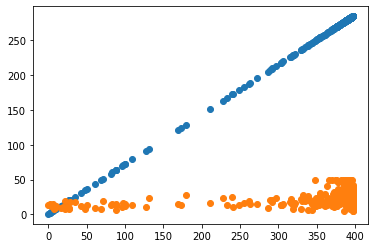

In [199]:
plt.scatter(x,hypothesis)
plt.scatter(x,y)
# plt.show()
plt.savefig("hello.jpg")

In [204]:
import plotly.graph_objects as go
# import pandas as pd
import numpy as np
# Read data from a csv
# z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')
z =  list(dic_loss.values())
# sh_0, sh_1 = z.shape
# theta0 = [i[0] for i in dic_theta.values()]
# theta1 = [j[1] for j in dic_theta.values()]
x=[i[0] for i in dic_theta.values()]
y=[j[1] for j in dic_theta.values()]
# x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Cost vs Weights', autosize=False,width=500, height=500,margin=dict(l=65, r=50, b=65, t=90))
fig.show()